In [1]:
## import libraries
from __future__ import division
from datetime import datetime, timedelta
from IPython.display import display
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gc

## Change the limit of rows and columns display
pd.options.display.max_columns= None
pd.options.display.max_rows= None


In [2]:
## Load our data from Excel file and display the 10 first rows
data= pd.read_excel("Online Retail.xlsx")
print(data.shape)
display(data.head())


(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
## Check variable types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# ## Convert the string date field to datetime
# data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# print(data.shape)
# display(data.head())

### EDA - Exploratory Data Analysis

In [5]:
## Check missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
## Remove all the rows where the CustomerID are missing and check missing values again
data= data.dropna(subset=['CustomerID'])
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
## Check if there is duplicated data 
data.duplicated().sum()

5225

In [8]:
## Clean duplicated data
data = data.drop_duplicates()

In [9]:
## Check if there is negative Quantity
data_negative_quatity= data[(data['Quantity']<0)]
print(data_negative_quatity.shape)
display(data_negative_quatity.head(5))

## Remove dataframe
del data_negative_quatity
gc.collect()

(8872, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


542009

In [10]:
## Check if there is negative UnitPrice

data_negative_unitprice= data[(data['UnitPrice']<0)]
print(data_negative_unitprice.shape)
display(data_negative_unitprice.head(5))

## Remove dataframe
del data_negative_unitprice
gc.collect()

(0, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


20

In [11]:
## As can be seen above we have a minimum quantity with negative value; the min quantity should be equal to 0. 
data= data[(data['Quantity']>0) & (data['UnitPrice']>0)]
display(data.describe()) 

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


### Recency

(4338, 1)


,CustomerID,Recency
0,17850.0,371
1,13047.0,31
2,12583.0,2
3,13748.0,95
4,15100.0,333


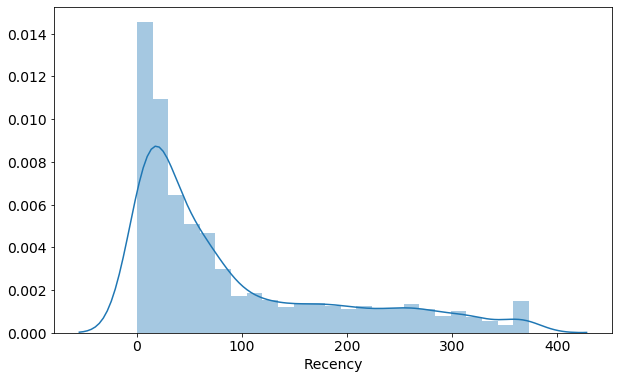

In [12]:
#create a generic user dataframe to keep CustomerID and new segmentation scores
user = pd.DataFrame(data['CustomerID'].unique())
user.columns = ['CustomerID']
print(user.shape)

#get the max purchase date for each customer and create a dataframe with it
max_purchase = data.groupby('CustomerID').InvoiceDate.max().reset_index()
max_purchase.columns = ['CustomerID','MaxPurchaseDate']

#we take our observation point as the max invoice date in our dataset
max_purchase['Recency'] = (max_purchase['MaxPurchaseDate'].max() - max_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
user = pd.merge(user, max_purchase[['CustomerID','Recency']], on='CustomerID')

display(user.head())

#plot a recency histogram
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.distplot(user['Recency'],)
plt.show()

In [13]:
user.Recency.describe()

count    4338.000000
mean       91.536422
std       100.014169
min         0.000000
25%        17.000000
50%        50.000000
75%       141.000000
max       373.000000
Name: Recency, dtype: float64


# Selecting the number of clusters with silhouette analysis


Silhouette analysis can be used to study the separation distance between the
resulting clusters. The silhouette plot displays a measure of how close each
point in one cluster is to points in the neighboring clusters and thus provides
a way to assess parameters like number of clusters visually. This measure has a
range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate
that the sample is far away from the neighboring clusters. A value of 0
indicates that the sample is on or very close to the decision boundary between
two neighboring clusters and negative values indicate that those samples might
have been assigned to the wrong cluster.



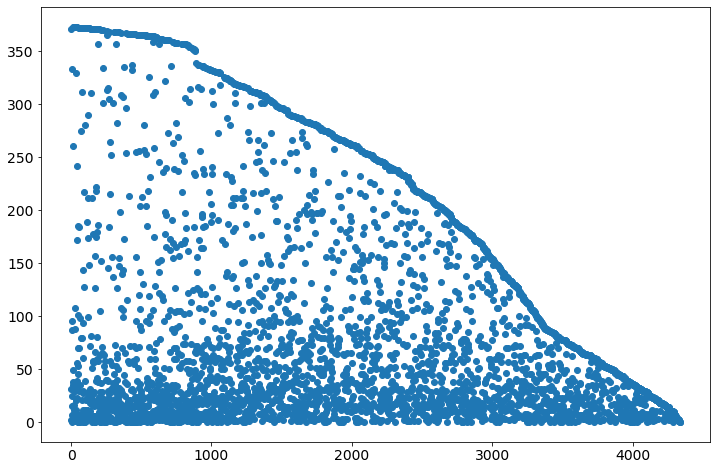

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(user.index, user['Recency'])

#### KMeans

For n_clusters = 2 The average silhouette_score is : 0.739578237472647
For n_clusters = 3 The average silhouette_score is : 0.6753563264577284
For n_clusters = 4 The average silhouette_score is : 0.6194536684087448
For n_clusters = 5 The average silhouette_score is : 0.6182145911024565
For n_clusters = 6 The average silhouette_score is : 0.6084053096902157
For n_clusters = 7 The average silhouette_score is : 0.5676384690685555
For n_clusters = 8 The average silhouette_score is : 0.5665158627196276
For n_clusters = 9 The average silhouette_score is : 0.5703244230664024
For n_clusters = 10 The average silhouette_score is : 0.5676986813207657


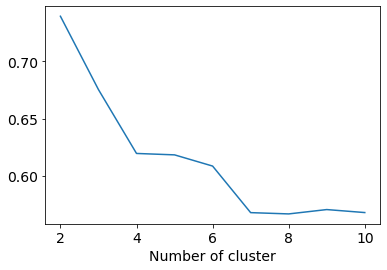

In [15]:
## Silhouette analysis
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
    
silhouette_avg= {}

for n_clusters in range(2,11):

    kmeans = KMeans(n_clusters=n_clusters, max_iter=1000)
    cluster_labels = kmeans.fit_predict(user[['Recency']])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    silhouette_avg[n_clusters] = silhouette_score(user[['Recency']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg[n_clusters])


plt.figure()
plt.plot(list(silhouette_avg.keys()), list(silhouette_avg.values()))
plt.xlabel("Number of cluster")
plt.show()
    

#### Hierarchical Cluster Analysis - HCA

For n_clusters = 2 The average silhouette_score is : 0.7355752052325204
For n_clusters = 3 The average silhouette_score is : 0.6073020014162079
For n_clusters = 4 The average silhouette_score is : 0.5902914475955533
For n_clusters = 5 The average silhouette_score is : 0.5906513232934075
For n_clusters = 6 The average silhouette_score is : 0.5867266587953731
For n_clusters = 7 The average silhouette_score is : 0.5291878791698656
For n_clusters = 8 The average silhouette_score is : 0.5258057054546215
For n_clusters = 9 The average silhouette_score is : 0.5338209478798723
For n_clusters = 10 The average silhouette_score is : 0.5378395820809138


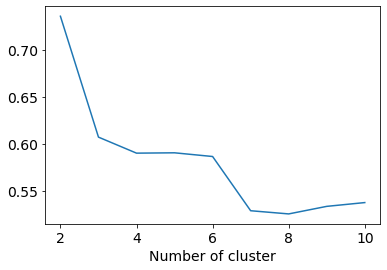

In [16]:
from sklearn.cluster import AgglomerativeClustering

silhouette_avg= {}

for n_clusters in range(2,11):

    hca = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hca.fit_predict(user[['Recency']])

    silhouette_avg[n_clusters] = silhouette_score(user[['Recency']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg[n_clusters])


plt.figure()
plt.plot(list(silhouette_avg.keys()), list(silhouette_avg.values()))
plt.xlabel("Number of cluster")
plt.show()

#### Gaussian Mixture

For n_clusters = 2 The average silhouette_score is : 0.6683235892837462
For n_clusters = 3 The average silhouette_score is : 0.5483980470644194
For n_clusters = 4 The average silhouette_score is : 0.5901276022270496
For n_clusters = 5 The average silhouette_score is : 0.5952462881808697
For n_clusters = 6 The average silhouette_score is : 0.5990550721182251
For n_clusters = 7 The average silhouette_score is : 0.5769439459789908
For n_clusters = 8 The average silhouette_score is : 0.53976177242928
For n_clusters = 9 The average silhouette_score is : 0.5572947301061164
For n_clusters = 10 The average silhouette_score is : 0.5668890514030553


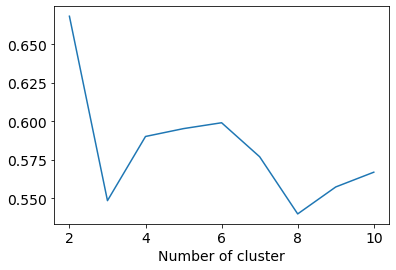

In [17]:
from sklearn.mixture import GaussianMixture

silhouette_avg= {}

for n_clusters in range(2,11):

    gmm = GaussianMixture(n_components=n_clusters)
    cluster_labels = gmm.fit_predict(user[['Recency']])

    silhouette_avg[n_clusters] = silhouette_score(user[['Recency']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg[n_clusters])


plt.figure()
plt.plot(list(silhouette_avg.keys()), list(silhouette_avg.values()))
plt.xlabel("Number of cluster")
plt.show()

Based the results above we are going to build Kmeans clustering with 2 clusters

In [18]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=2)
kmeans.fit(user[['Recency']])
user['RecencyCluster'] = kmeans.predict(user[['Recency']])

display(user.groupby("RecencyCluster").Recency.describe())

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,1072.0,247.140858,66.364875,144.0,189.0,242.0,298.5,373.0
1,3266.0,40.462339,35.821866,0.0,11.0,29.0,63.0,143.0


In [19]:

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final



In [20]:
user = order_cluster('RecencyCluster', 'Recency',user,False)
display(user.head())

display(user.groupby("RecencyCluster").Recency.describe())

,CustomerID,Recency,RecencyCluster
0,17850.0,371,0
1,15100.0,333,0
2,18074.0,373,0
3,16250.0,260,0
4,13747.0,373,0


,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,1072.0,247.140858,66.364875,144.0,189.0,242.0,298.5,373.0
1,3266.0,40.462339,35.821866,0.0,11.0,29.0,63.0,143.0


### Frequency

In [21]:
user.head()

,CustomerID,Recency,RecencyCluster
0,17850.0,371,0
1,15100.0,333,0
2,18074.0,373,0
3,16250.0,260,0
4,13747.0,373,0


In [22]:
# data.groupby("Quantity").
data.loc[:, ["CustomerID", "InvoiceNo", "InvoiceDate", "Description", "Quantity"]].head()

,CustomerID,InvoiceNo,InvoiceDate,Description,Quantity
0,17850.0,536365,2010-12-01 08:26:00,WHITE HANGING HEART T-LIGHT HOLDER,6
1,17850.0,536365,2010-12-01 08:26:00,WHITE METAL LANTERN,6
2,17850.0,536365,2010-12-01 08:26:00,CREAM CUPID HEARTS COAT HANGER,8
3,17850.0,536365,2010-12-01 08:26:00,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,17850.0,536365,2010-12-01 08:26:00,RED WOOLLY HOTTIE WHITE HEART.,6


In [23]:
data.InvoiceNo.value_counts()[:10]

576339    542
579196    533
580727    529
578270    442
573576    435
567656    421
567183    392
575607    377
571441    364
570488    353
Name: InvoiceNo, dtype: int64

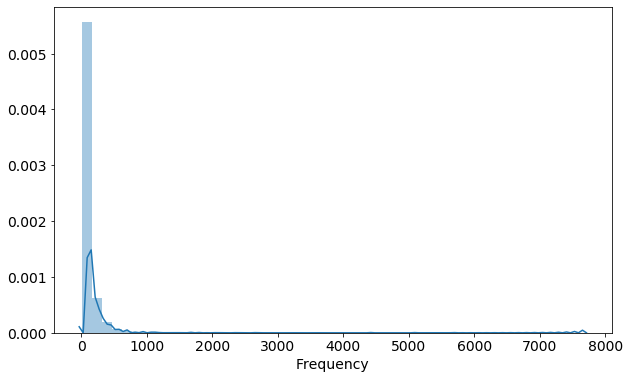

In [24]:
## Get order counts for each user and create a dataframe with it
frequency = data.groupby('CustomerID').InvoiceDate.count().reset_index()
frequency.columns = ['CustomerID','Frequency']

## Add this data to our main dataframe
user = pd.merge(user, frequency, on='CustomerID')

#plot the histogram
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.distplot(user['Frequency'],)
plt.show()

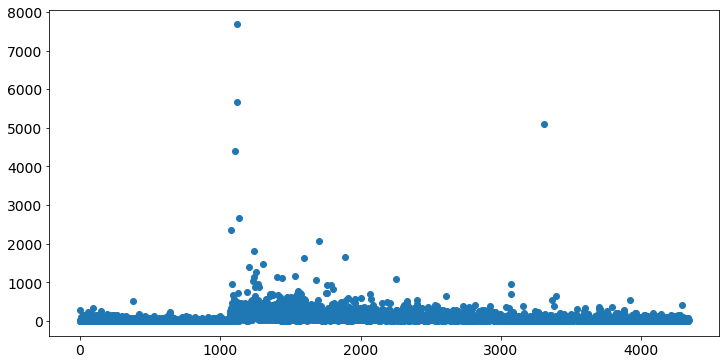

In [25]:
plt.figure(figsize=(12,6))
plt.scatter(user.index, user[['Frequency']])

#### KMeans

For n_clusters = 2 The average silhouette_score is : 0.9805971909407849
For n_clusters = 3 The average silhouette_score is : 0.818819677859653
For n_clusters = 4 The average silhouette_score is : 0.7668710675951667
For n_clusters = 5 The average silhouette_score is : 0.6912227950751206
For n_clusters = 6 The average silhouette_score is : 0.6910000813281895
For n_clusters = 7 The average silhouette_score is : 0.6707144049822852
For n_clusters = 8 The average silhouette_score is : 0.6511919552920266
For n_clusters = 9 The average silhouette_score is : 0.6247167033152039
For n_clusters = 10 The average silhouette_score is : 0.6016821340301087


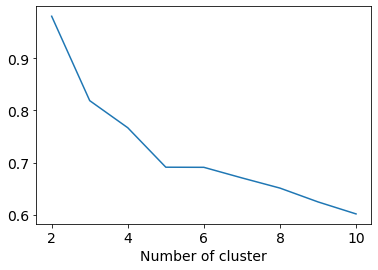

In [26]:
## Silhouette analysis
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
    
silhouette_avg= {}

for n_clusters in range(2,11):

    kmeans = KMeans(n_clusters=n_clusters, max_iter=1000)
    cluster_labels = kmeans.fit_predict(user[['Frequency']])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    silhouette_avg[n_clusters] = silhouette_score(user[['Frequency']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg[n_clusters])


plt.figure()
plt.plot(list(silhouette_avg.keys()), list(silhouette_avg.values()))
plt.xlabel("Number of cluster")
plt.show()
    

#### Hierarchical Cluster Analysis - HCA

For n_clusters = 2 The average silhouette_score is : 0.9805971909407849
For n_clusters = 3 The average silhouette_score is : 0.7203955313447061
For n_clusters = 4 The average silhouette_score is : 0.7266937889985015
For n_clusters = 5 The average silhouette_score is : 0.6797008141934892
For n_clusters = 6 The average silhouette_score is : 0.6796066347767966
For n_clusters = 7 The average silhouette_score is : 0.6800245486294083
For n_clusters = 8 The average silhouette_score is : 0.6158544518114736
For n_clusters = 9 The average silhouette_score is : 0.6188628104463243
For n_clusters = 10 The average silhouette_score is : 0.6197521205311678


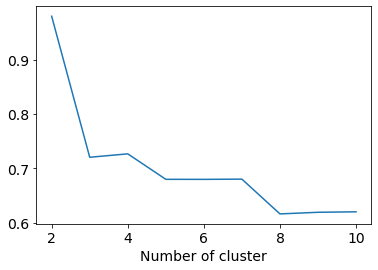

In [27]:
from sklearn.cluster import AgglomerativeClustering

silhouette_avg= {}

for n_clusters in range(2,11):

    hca = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hca.fit_predict(user[['Frequency']])

    silhouette_avg[n_clusters] = silhouette_score(user[['Frequency']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg[n_clusters])


plt.figure()
plt.plot(list(silhouette_avg.keys()), list(silhouette_avg.values()))
plt.xlabel("Number of cluster")
plt.show()

#### Gaussian Mixture

For n_clusters = 2 The average silhouette_score is : 0.7650743990173026
For n_clusters = 3 The average silhouette_score is : 0.6171305881066509
For n_clusters = 4 The average silhouette_score is : 0.5865609300117032
For n_clusters = 5 The average silhouette_score is : 0.5873935131609787
For n_clusters = 6 The average silhouette_score is : 0.5874312140762031
For n_clusters = 7 The average silhouette_score is : 0.5891923494440803
For n_clusters = 8 The average silhouette_score is : 0.5978519791207045
For n_clusters = 9 The average silhouette_score is : 0.5949914218295389
For n_clusters = 10 The average silhouette_score is : 0.5969706841072926


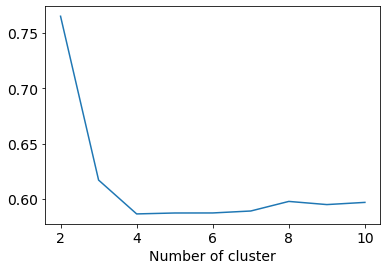

In [28]:
from sklearn.mixture import GaussianMixture

silhouette_avg= {}

for n_clusters in range(2,11):

    gmm = GaussianMixture(n_components=n_clusters)
    cluster_labels = gmm.fit_predict(user[['Frequency']])

    silhouette_avg[n_clusters] = silhouette_score(user[['Frequency']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg[n_clusters])


plt.figure()
plt.plot(list(silhouette_avg.keys()), list(silhouette_avg.values()))
plt.xlabel("Number of cluster")
plt.show()

Based the results above we have the choice between HCA and Kmeans clustering with 2 clusters

In [29]:
#
hca = AgglomerativeClustering(n_clusters=2)
# hca.fit(user[['Frequency']])
user['FrequencyCluster'] = hca.fit_predict(user[['Frequency']])

#order the frequency cluster
user = order_cluster('FrequencyCluster', 'Frequency',user,True)

#see details of each cluster
user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,4334.0,85.330641,142.416534,1.0,17.00,41.0,98.0,2677.0
1,4.0,5717.250000,1403.584785,4412.0,4936.25,5390.5,6171.5,7676.0


### Monetary or Revenue

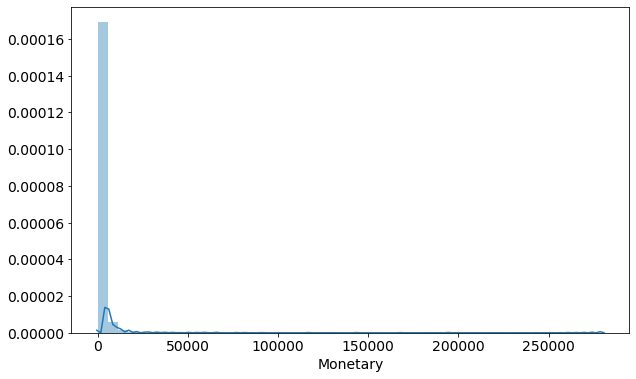

In [30]:
#calculate revenue for each customer
data['Monetary'] = data['UnitPrice'] * data['Quantity']
monetary = data.groupby('CustomerID').Monetary.sum().reset_index()

#merge it with our main dataframe
user = pd.merge(user, monetary, on='CustomerID')

#plot the histogram
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.distplot(user['Monetary'],)
plt.show()

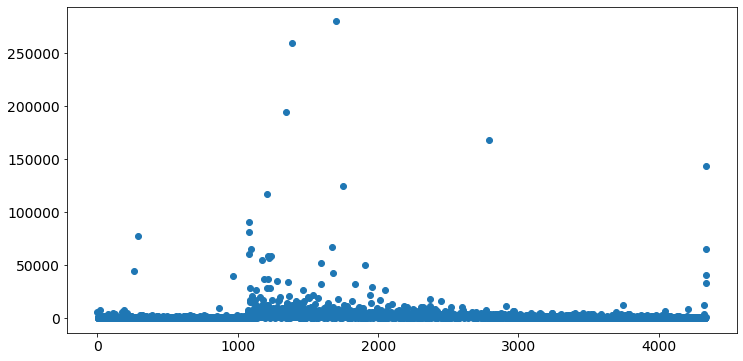

In [31]:
plt.figure(figsize=(12,6))
plt.scatter(user.index, user[['Monetary']])

#### KMeans

For n_clusters = 2 The average silhouette_score is : 0.9846461090500441
For n_clusters = 3 The average silhouette_score is : 0.9616231870161882
For n_clusters = 4 The average silhouette_score is : 0.9548708041009409
For n_clusters = 5 The average silhouette_score is : 0.8390807349651267
For n_clusters = 6 The average silhouette_score is : 0.7796279114469337
For n_clusters = 7 The average silhouette_score is : 0.7398747561063223
For n_clusters = 8 The average silhouette_score is : 0.7379907051245251
For n_clusters = 9 The average silhouette_score is : 0.6876924271520861
For n_clusters = 10 The average silhouette_score is : 0.690964082876515


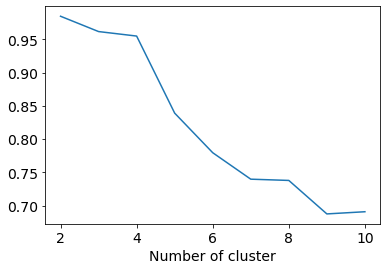

In [32]:
## Silhouette analysis
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
    
silhouette_avg= {}

for n_clusters in range(2,11):

    kmeans = KMeans(n_clusters=n_clusters, max_iter=1000)
    cluster_labels = kmeans.fit_predict(user[['Monetary']])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    silhouette_avg[n_clusters] = silhouette_score(user[['Monetary']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg[n_clusters])


plt.figure()
plt.plot(list(silhouette_avg.keys()), list(silhouette_avg.values()))
plt.xlabel("Number of cluster")
plt.show()
    

#### Hierarchical Cluster Analysis - HCA

For n_clusters = 2 The average silhouette_score is : 0.9855477019871731
For n_clusters = 3 The average silhouette_score is : 0.9634061593504576
For n_clusters = 4 The average silhouette_score is : 0.8976608848472869
For n_clusters = 5 The average silhouette_score is : 0.8981312260667816
For n_clusters = 6 The average silhouette_score is : 0.7400526670281791
For n_clusters = 7 The average silhouette_score is : 0.7439978651961684
For n_clusters = 8 The average silhouette_score is : 0.7438683034873573
For n_clusters = 9 The average silhouette_score is : 0.744136860702408
For n_clusters = 10 The average silhouette_score is : 0.7085644079755651


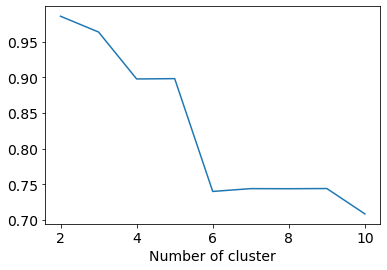

In [33]:
from sklearn.cluster import AgglomerativeClustering

silhouette_avg= {}

for n_clusters in range(2,11):

    hca = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hca.fit_predict(user[['Monetary']])

    silhouette_avg[n_clusters] = silhouette_score(user[['Monetary']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg[n_clusters])


plt.figure()
plt.plot(list(silhouette_avg.keys()), list(silhouette_avg.values()))
plt.xlabel("Number of cluster")
plt.show()

#### Gaussian Mixture

For n_clusters = 2 The average silhouette_score is : 0.8134073019464685
For n_clusters = 3 The average silhouette_score is : 0.606921364433046
For n_clusters = 4 The average silhouette_score is : 0.6043686664338276
For n_clusters = 5 The average silhouette_score is : 0.5869771805236124
For n_clusters = 6 The average silhouette_score is : 0.584857590044407
For n_clusters = 7 The average silhouette_score is : 0.5895307621586008
For n_clusters = 8 The average silhouette_score is : 0.5897486310552784
For n_clusters = 9 The average silhouette_score is : 0.5878461944291664
For n_clusters = 10 The average silhouette_score is : 0.5941758167172757


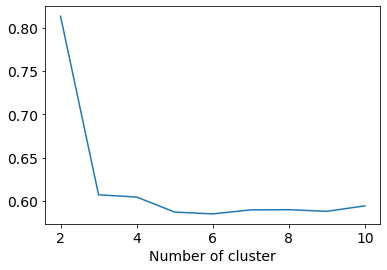

In [34]:
from sklearn.mixture import GaussianMixture

silhouette_avg= {}

for n_clusters in range(2,11):

    gmm = GaussianMixture(n_components=n_clusters)
    cluster_labels = gmm.fit_predict(user[['Monetary']])

    silhouette_avg[n_clusters] = silhouette_score(user[['Monetary']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg[n_clusters])


plt.figure()
plt.plot(list(silhouette_avg.keys()), list(silhouette_avg.values()))
plt.xlabel("Number of cluster")
plt.show()

Based the results above, the best models is Kmeans clustering with 2, 3 or 4 clusters

In [35]:
#apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(user[['Monetary']])
user['MonetaryCluster'] = kmeans.predict(user[['Monetary']])


#order the cluster numbers
user = order_cluster('MonetaryCluster', 'Monetary',user,True)

#show details of the dataframe
user.groupby('MonetaryCluster')['Monetary'].describe()



,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,4300.0,1433.017266,2223.372955,3.75,304.965,658.76,1614.46,21429.39
1,31.0,46344.266452,17875.360382,25977.16,31870.250,40519.84,58636.28,91062.38
2,5.0,149739.814000,31841.192074,117210.08,124914.530,143711.17,168472.50,194390.79
3,2.0,269931.660000,14530.139257,259657.30,264794.480,269931.66,275068.84,280206.02


### Overall Score

In [36]:
#calculate overall score and use mean() to see details
user['OverallScore'] = user['RecencyCluster'] + user['FrequencyCluster'] + user['MonetaryCluster']
user.groupby('OverallScore')['Recency','Frequency','Monetary'].mean()

,Recency,Frequency,Monetary
OverallScore,,,
0,247.142189,29.030870,498.713041
1,41.024737,99.143785,1790.502289
2,6.880000,528.120000,45452.001600
3,6.142857,2806.714286,106246.531429
4,0.333333,2725.666667,227858.163333


The scoring above clearly shows us that customers with score 4 is our best customers whereas 0 is the worst.

To keep things simple, better we name these scores:

* 0 : Low Value
* 1 : Mid Value
* 2+: High Value

We can easily apply this naming on our dataframe:

In [37]:
user['Segment'] = 'Low-Value'
user.loc[user['OverallScore']>0,'Segment'] = 'Mid-Value' 
user.loc[user['OverallScore']>1,'Segment'] = 'High-Value' 

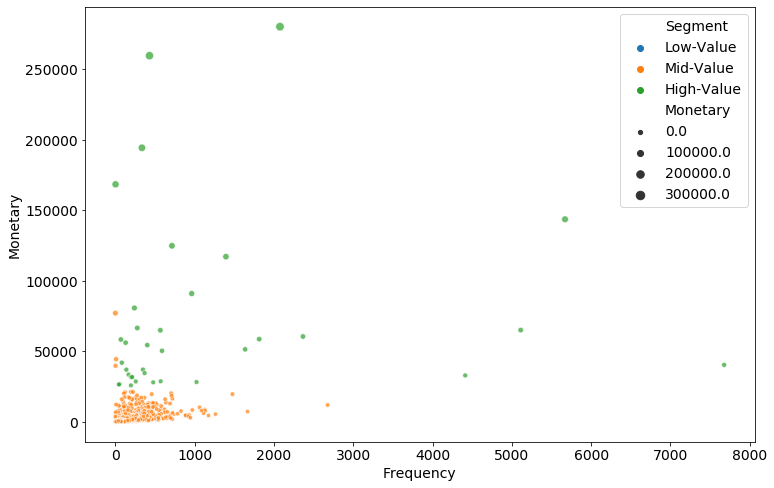

In [38]:
## Monetary vs Frequency
plt.figure(figsize=(12,8))
sns.scatterplot(x="Frequency", y="Monetary", hue="Segment", data=user, alpha=0.7, size="Monetary")
plt.show()

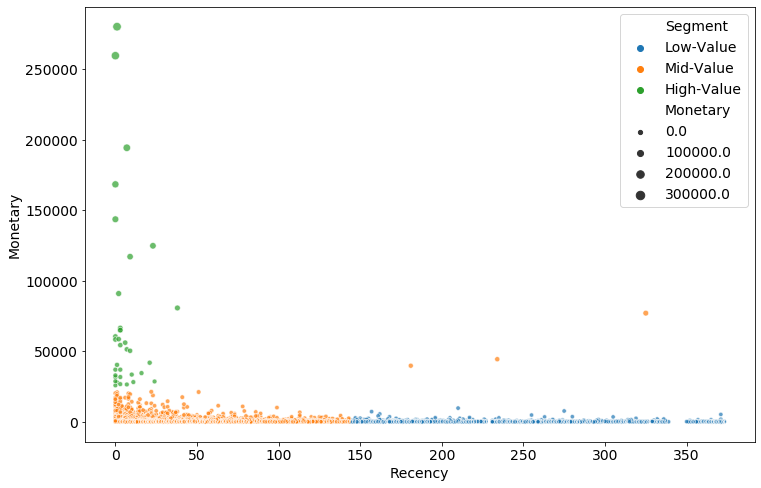

In [39]:
## Monetary vs Recency
plt.figure(figsize=(12,8))
sns.scatterplot(x="Recency", y="Monetary", hue="Segment", data=user, alpha=0.7, size="Monetary")
plt.show()

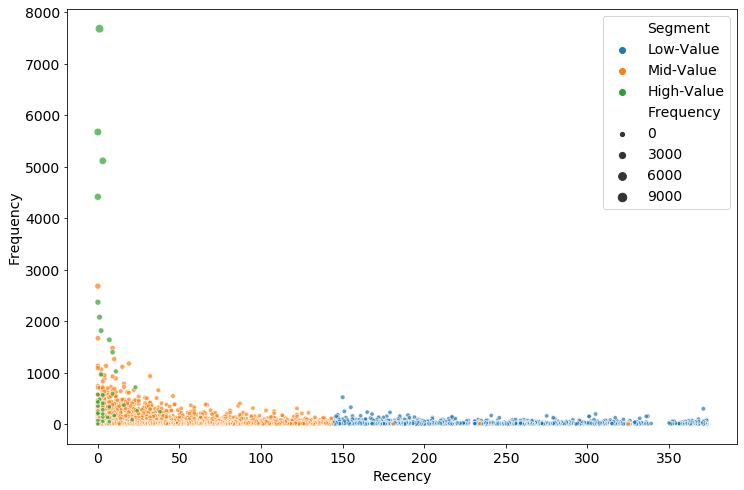

In [40]:
## Monetary vs Recency
plt.figure(figsize=(12,8))
sns.scatterplot(x="Recency", y="Frequency", hue="Segment", data=user, alpha=0.7, size="Frequency")
plt.show()

In [41]:
data_cols= [ "StockCode", "Description", "CustomerID", "Country", "Monetary", "InvoiceDate"]
user_cols= ["CustomerID", "Segment"]

data_desc= pd.merge(data.loc[:, data_cols], user.loc[:, user_cols], on="CustomerID")
print(data_desc.shape)

display(data_desc.head())

(392692, 7)


,StockCode,Description,CustomerID,Country,Monetary,InvoiceDate,Segment
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,United Kingdom,15.30,2010-12-01 08:26:00,Low-Value
1,71053,WHITE METAL LANTERN,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,Low-Value
2,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,United Kingdom,22.00,2010-12-01 08:26:00,Low-Value
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,Low-Value
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,Low-Value


In [42]:
users_by_country= data_desc.groupby("Country").CustomerID.nunique()
users_by_country.sort_values(ascending=False)

Country
United Kingdom          3920
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Channel Islands            9
Denmark                    9
Australia                  9
Netherlands                9
Cyprus                     8
Japan                      8
Sweden                     8
Poland                     6
Unspecified                4
Greece                     4
USA                        4
Canada                     4
Israel                     3
EIRE                       3
United Arab Emirates       2
Bahrain                    2
Malta                      2
Czech Republic             1
Singapore                  1
Lithuania                  1
Saudi Arabia               1
Brazil                     1
RSA                        1
Icelan

### Define some useful functions

In [43]:

def show_top_20_prefered_products(data, fontsize=14):
    """This graph shows the top 20 prefered products by the customers"""
    
    data_by_descr= data.groupby("Description").CustomerID.nunique().sort_values(ascending=False)
    data_by_descr_per=(data_by_descr*100/data.CustomerID.nunique())

    plt.figure(figsize=(15,8))
    plt.rcParams.update({'font.size': 12})
    ax= plt.bar(data_by_descr_per[:20].index, data_by_descr_per[:20])
    
    for r in ax:
        h = r.get_height()
        plt.text(r.get_x() + r.get_width() / 2., h , "{:.0f}%".format(h), ha="center", va="bottom", 
             color="red", fontsize=12, fontweight="bold"
        )
        
    plt.xlabel("Products' descriptions", fontsize=fontsize)
    plt.ylabel("Percentage of customers who prefer the products", fontsize=fontsize)
    plt.xticks(rotation=90)
    plt.show()
    
def show_top_20_most_bought_products(data, fontsize=14):
    """This graph shows the top 20 products most frequently bought by the customers"""
    
    data_trans_by_descr= data.groupby("Description").InvoiceDate.count().sort_values(ascending=False)

    plt.figure(figsize=(15,8))
    plt.rcParams.update({'font.size': 12})
    ax= plt.bar(data_trans_by_descr[:20].index, data_trans_by_descr[:20])
    
    for r in ax:
        h = r.get_height()
        plt.text(r.get_x() + r.get_width() / 2., h , "{:.0f}".format(h), ha="center", va="bottom", 
             color="red", fontsize=12, fontweight="bold"
        )
        
    plt.xlabel("Products' descriptions", fontsize=fontsize)
    plt.ylabel("Number of times the products was purchased", fontsize=fontsize)
    plt.xticks(rotation=90)
    plt.show()
    

def show_top_20_most_profitable_products(data, fontsize=14):
    """This graph shows the top 20 products most profitable in terms of revenue"""
    
    data_monetary_by_descr= data.groupby(["Description"]).Monetary.sum().sort_values(ascending=False)

    plt.figure(figsize=(15,8))
    plt.rcParams.update({'font.size': 12})
    ax= plt.bar(data_monetary_by_descr[:20].index, data_monetary_by_descr[:20])
    
    for r in ax:
        h = r.get_height()
        plt.text(r.get_x() + r.get_width() / 2., h-10000 , "{:,.0f}£".format(h), ha="center", va="bottom", 
             color="red", fontsize=12, fontweight="bold", rotation= 60
        )
    
    plt.xlabel("Products' descriptions.", fontsize=fontsize)
    plt.ylabel("How much was spent on the products (USD).", fontsize=fontsize)
    plt.xticks(rotation=90)
    plt.show()

### High-Value Users

In [44]:
high_value_users= data_desc.query("Segment== 'High-Value'")

high_value_users.shape

(41027, 7)

In [45]:
high_value_users.CustomerID.nunique()

35

In [46]:
hv_users_by_country= high_value_users.groupby("Country").CustomerID.nunique()
(hv_users_by_country*100/high_value_users.CustomerID.nunique()).sort_values(ascending=False)

Country
United Kingdom    85.714286
EIRE               5.714286
Sweden             2.857143
Netherlands        2.857143
Australia          2.857143
Name: CustomerID, dtype: float64

In [47]:
(hv_users_by_country*100/users_by_country).dropna().sort_values(ascending=False)

Country
EIRE              66.666667
Sweden            12.500000
Netherlands       11.111111
Australia         11.111111
United Kingdom     0.765306
Name: CustomerID, dtype: float64

In [51]:
## Products bought by High-Value customers
hv_users_by_descr= high_value_users.groupby("Description").CustomerID.nunique()
hv_users_by_descr_per=(hv_users_by_descr*100/high_value_users.CustomerID.nunique()).sort_values(ascending=False)

hv_users_by_descr_per[hv_users_by_descr_per>=20][:15]

Description
JUMBO BAG RED RETROSPOT               68.571429
REGENCY CAKESTAND 3 TIER              54.285714
JAM MAKING SET WITH JARS              54.285714
PACK OF 72 RETROSPOT CAKE CASES       51.428571
LUNCH BAG RED RETROSPOT               51.428571
WHITE HANGING HEART T-LIGHT HOLDER    51.428571
JUMBO BAG PINK POLKADOT               51.428571
JUMBO BAG APPLES                      51.428571
LUNCH BAG APPLE DESIGN                48.571429
CHILLI LIGHTS                         48.571429
SET OF 3 CAKE TINS PANTRY DESIGN      45.714286
LUNCH BAG  BLACK SKULL.               45.714286
LUNCH BAG PINK POLKADOT               45.714286
DOORMAT RED RETROSPOT                 45.714286
RECIPE BOX PANTRY YELLOW DESIGN       45.714286
Name: CustomerID, dtype: float64

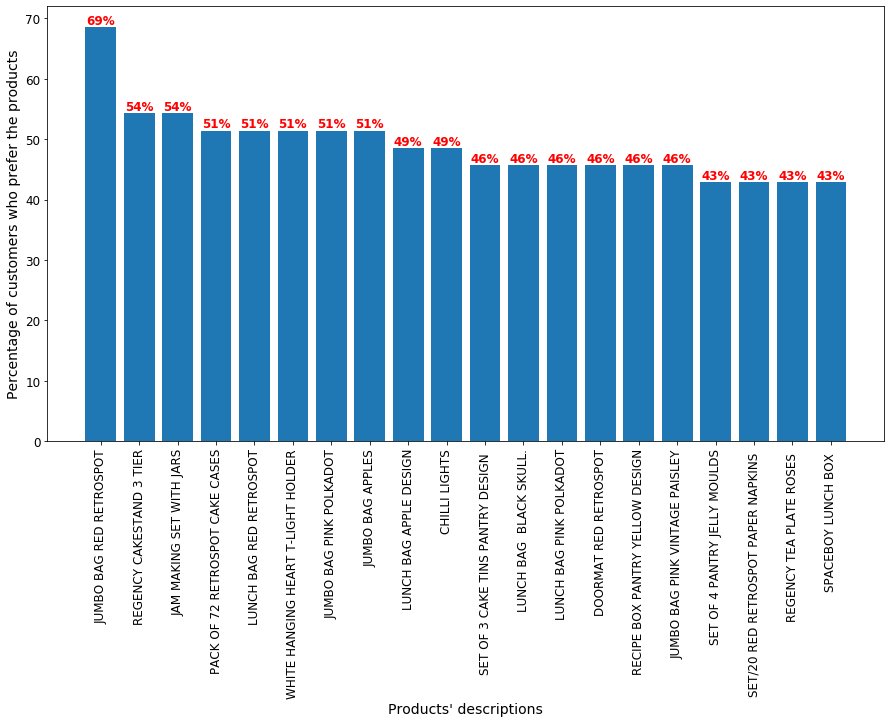

In [52]:
## This graph shows the top 20 most prefered products 
show_top_20_prefered_products(high_value_users)

In [54]:
## Products the most bought
hv_users_trans_by_descr= high_value_users.groupby("Description").InvoiceDate.count().sort_values(ascending=False)
hv_users_trans_by_descr[:15]


Description
JUMBO BAG RED RETROSPOT               203
REGENCY CAKESTAND 3 TIER              172
WHITE HANGING HEART T-LIGHT HOLDER    170
LUNCH BAG RED RETROSPOT               145
CHILLI LIGHTS                         145
LUNCH BAG  BLACK SKULL.               120
JUMBO BAG PINK POLKADOT               119
GUMBALL COAT RACK                     109
SET OF 4 PANTRY JELLY MOULDS          105
PACK OF 72 RETROSPOT CAKE CASES       105
SPACEBOY LUNCH BOX                    104
JAM MAKING SET WITH JARS              103
CHARLOTTE BAG SUKI DESIGN             103
JUMBO BAG STRAWBERRY                   99
LUNCH BAG CARS BLUE                    99
Name: InvoiceDate, dtype: int64

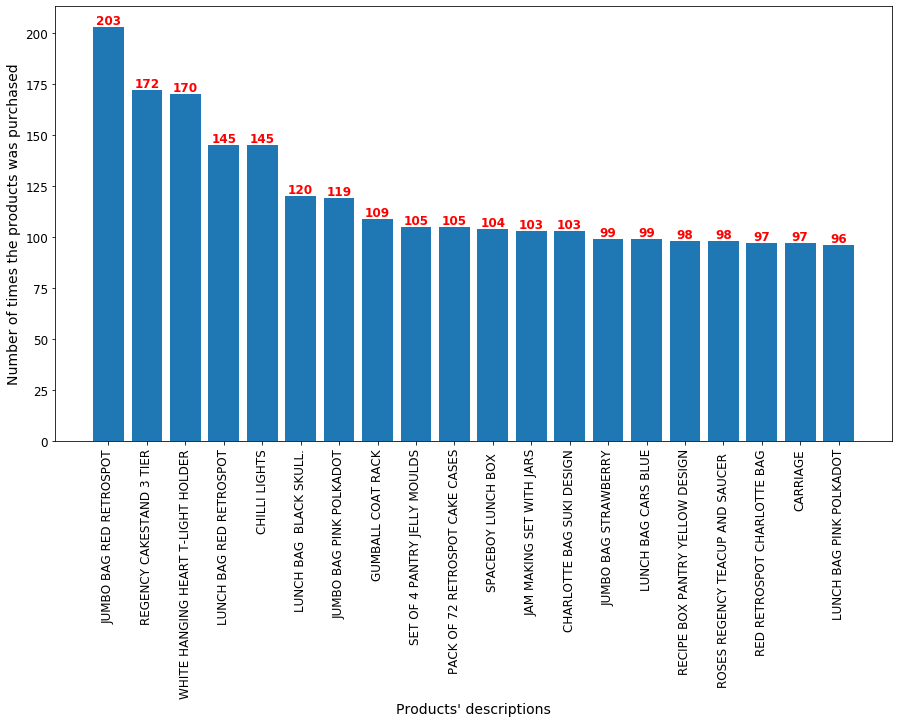

In [64]:
## This graph shows the top 20 of the products the most bought
show_top_20_most_bought_products(high_value_users)

In [55]:
## Products the most profitable
hv_users_monetary_by_descr= high_value_users.groupby(["Description"]).Monetary.sum().sort_values(ascending=False)

hv_users_monetary_by_descr[hv_users_monetary_by_descr>5000][:15]

Description
PAPER CRAFT , LITTLE BIRDIE            168469.60
REGENCY CAKESTAND 3 TIER                49034.70
JUMBO BAG RED RETROSPOT                 35881.29
WHITE HANGING HEART T-LIGHT HOLDER      33488.80
JUMBO BAG PINK POLKADOT                 19290.30
VINTAGE UNION JACK MEMOBOARD            19166.93
CHILLI LIGHTS                           18792.41
WOOD BLACK BOARD ANT WHITE FINISH       18534.36
RABBIT NIGHT LIGHT                      16172.17
JUMBO BAG STRAWBERRY                    15729.41
CREAM HEART CARD HOLDER                 15005.32
HEART OF WICKER LARGE                   14924.35
SET OF TEA COFFEE SUGAR TINS PANTRY     13816.58
SPACEBOY LUNCH BOX                      13194.09
ASSORTED COLOUR BIRD ORNAMENT           12183.55
Name: Monetary, dtype: float64

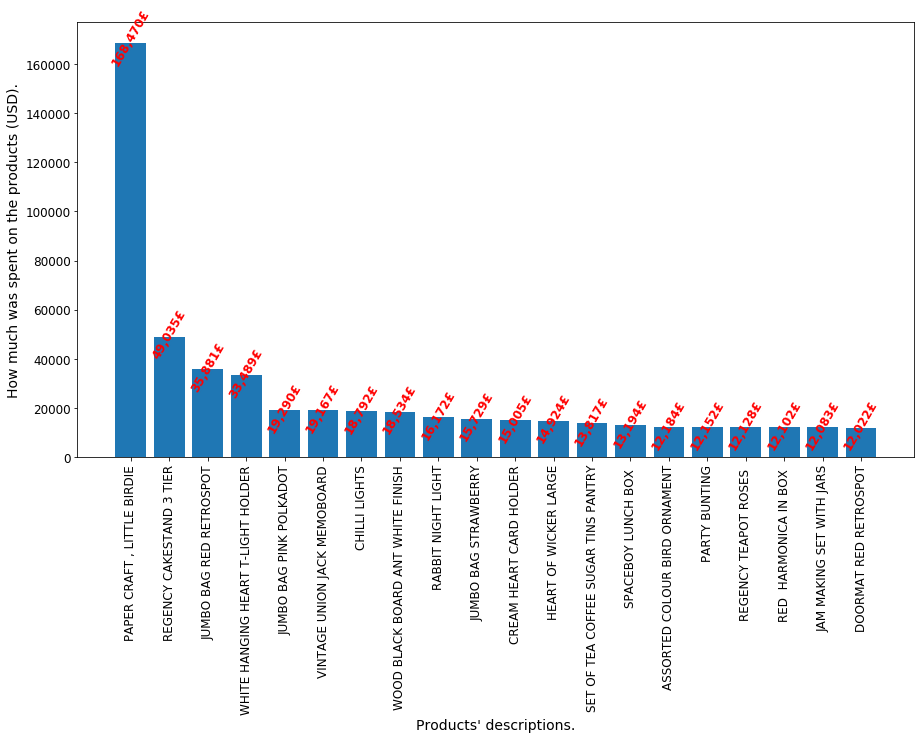

In [56]:
## This graph shows the top 20 products that produce the higher revenue
show_top_20_most_profitable_products(high_value_users)

In [57]:
high_value_users[high_value_users.Description=="PAPER CRAFT , LITTLE BIRDIE"]

,StockCode,Description,CustomerID,Country,Monetary,InvoiceDate,Segment
307133,23843,"PAPER CRAFT , LITTLE BIRDIE",16446.0,United Kingdom,168469.6,2011-12-09 09:15:00,High-Value


In [58]:
data[data.Description=="PAPER CRAFT , LITTLE BIRDIE"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6


### Mid-value Customers

In [59]:
## Mid-Value users transaction.
mid_value_users= data_desc.query("Segment== 'Mid-Value'")

print(mid_value_users.shape)
mid_value_users.head()

(320631, 7)


,StockCode,Description,CustomerID,Country,Monetary,InvoiceDate,Segment
297,84879,ASSORTED COLOUR BIRD ORNAMENT,13047.0,United Kingdom,54.08,2010-12-01 08:34:00,Mid-Value
298,22745,POPPY'S PLAYHOUSE BEDROOM,13047.0,United Kingdom,12.60,2010-12-01 08:34:00,Mid-Value
299,22748,POPPY'S PLAYHOUSE KITCHEN,13047.0,United Kingdom,12.60,2010-12-01 08:34:00,Mid-Value
300,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,13047.0,United Kingdom,30.00,2010-12-01 08:34:00,Mid-Value
301,22310,IVORY KNITTED MUG COSY,13047.0,United Kingdom,9.90,2010-12-01 08:34:00,Mid-Value


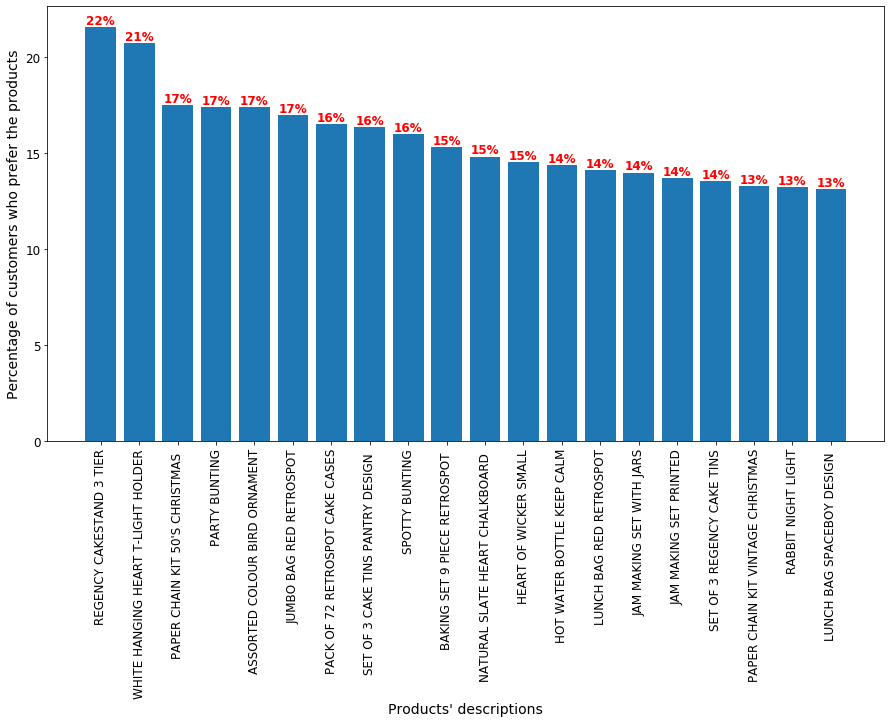

In [60]:
## This graph shows the top 20 most prefered products 
show_top_20_prefered_products(mid_value_users)

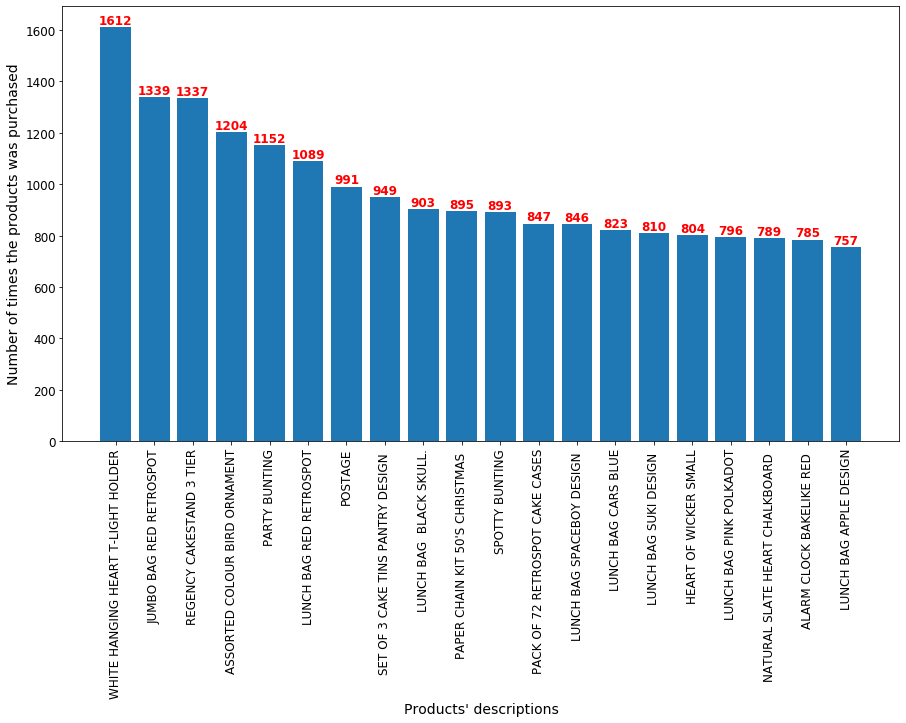

In [61]:
## This graph shows the top 20 of the products the most bought
show_top_20_most_bought_products(mid_value_users)

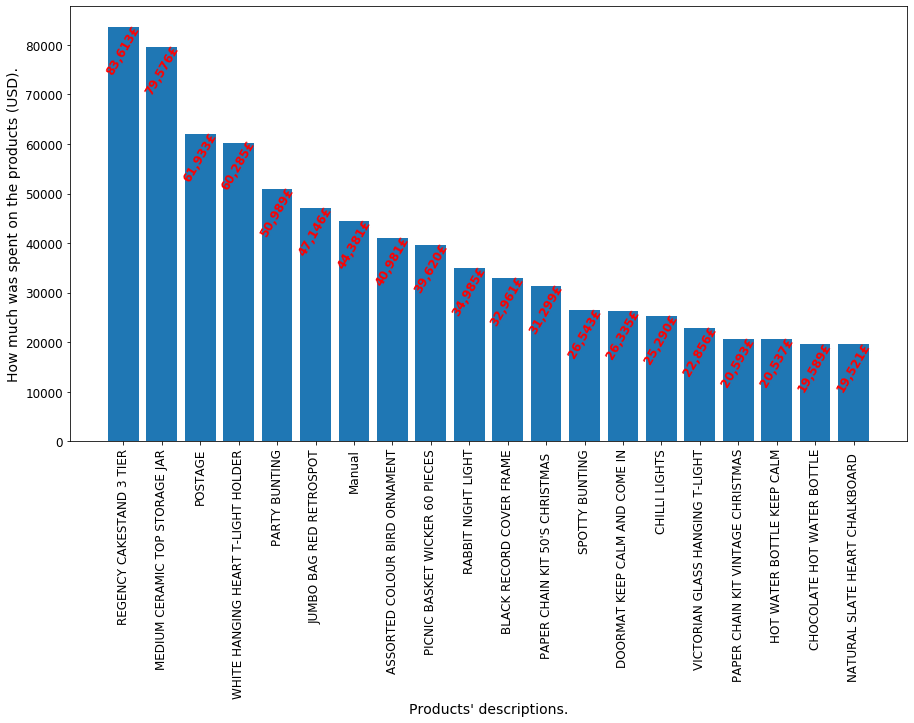

In [62]:
## This graph shows the top 20 products that produce the higher revenue
show_top_20_most_profitable_products(mid_value_users)

### Low-value Customer

In [63]:
## Low-Value users transaction.
low_value_users= data_desc.query("Segment== 'Low-Value'")

print(low_value_users.shape)
low_value_users.head()

(31034, 7)


,StockCode,Description,CustomerID,Country,Monetary,InvoiceDate,Segment
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,United Kingdom,15.30,2010-12-01 08:26:00,Low-Value
1,71053,WHITE METAL LANTERN,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,Low-Value
2,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,United Kingdom,22.00,2010-12-01 08:26:00,Low-Value
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,Low-Value
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,United Kingdom,20.34,2010-12-01 08:26:00,Low-Value


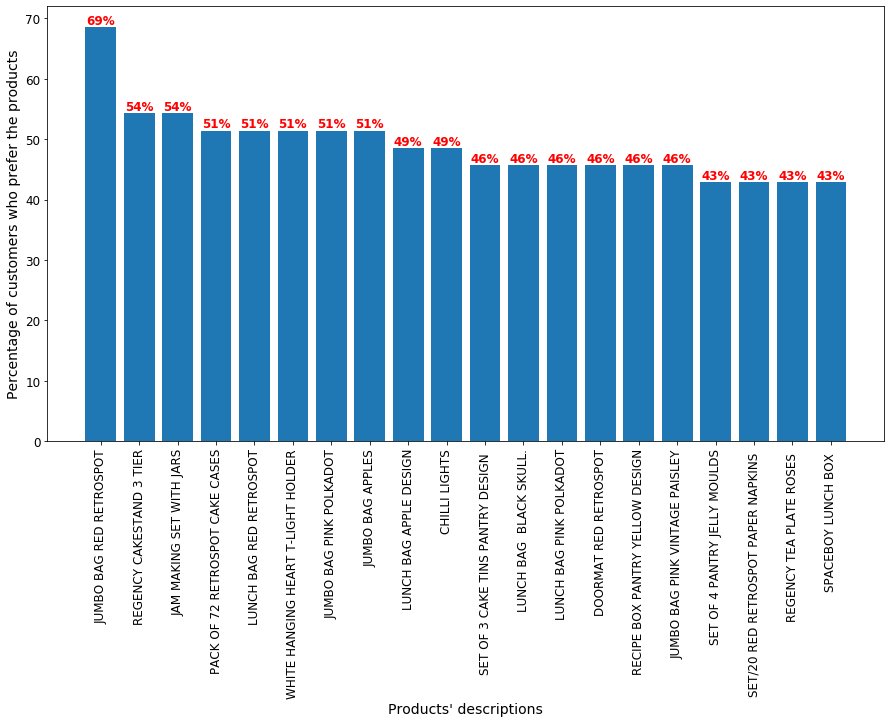

In [64]:
## This graph shows the top 20 most prefered products 
show_top_20_prefered_products(high_value_users)

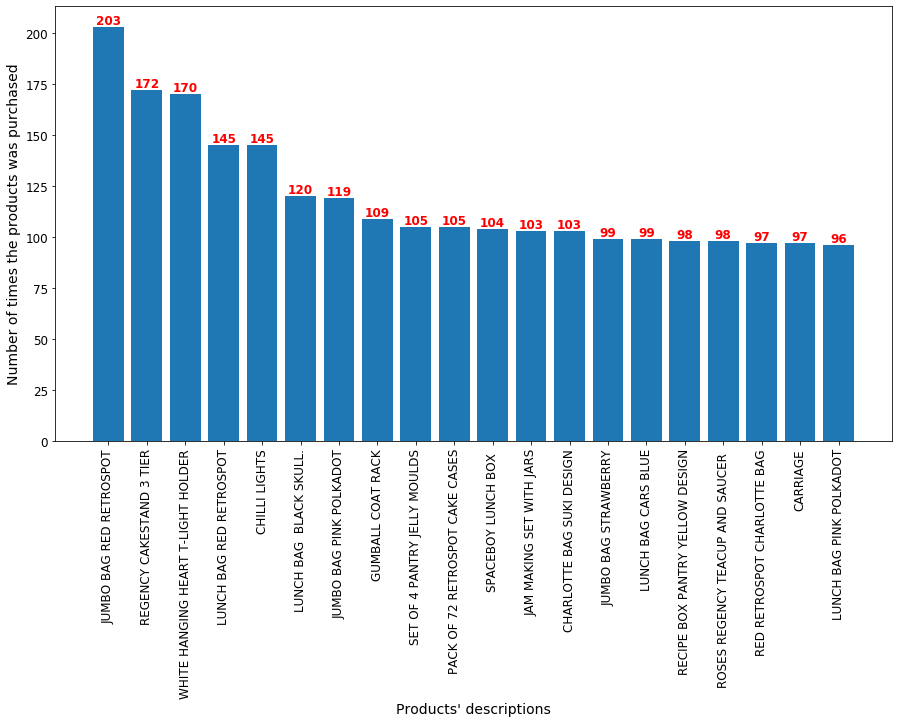

In [65]:
## This graph shows the top 20 of the products the most bought
show_top_20_most_bought_products(high_value_users)

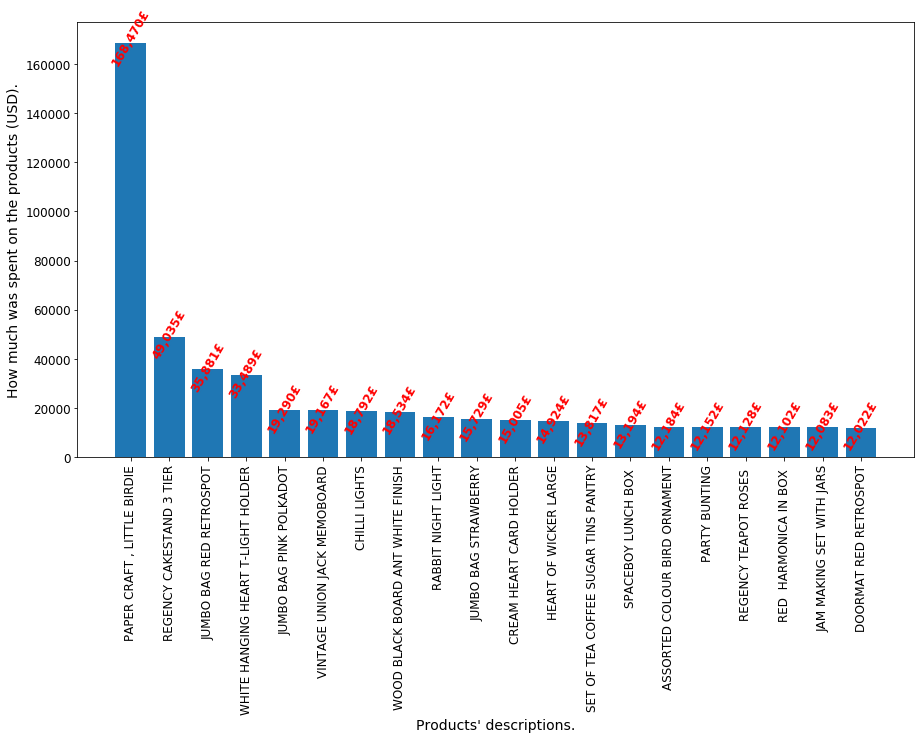

In [66]:
## This graph shows the top 20 products that produce the higher revenue
show_top_20_most_profitable_products(high_value_users)

### Overall 

In [67]:
## Number or/and the percentage compared to the total number of customers.

print("Number of customers per Segment")
print(user.Segment.value_counts())

print("\nPercentage of customers per Segment")
user.Segment.value_counts()*100/data.shape[0]

Number of customers per Segment
Mid-Value     3234
Low-Value     1069
High-Value      35
Name: Segment, dtype: int64

Percentage of customers per Segment


Mid-Value     0.823546
Low-Value     0.272224
High-Value    0.008913
Name: Segment, dtype: float64

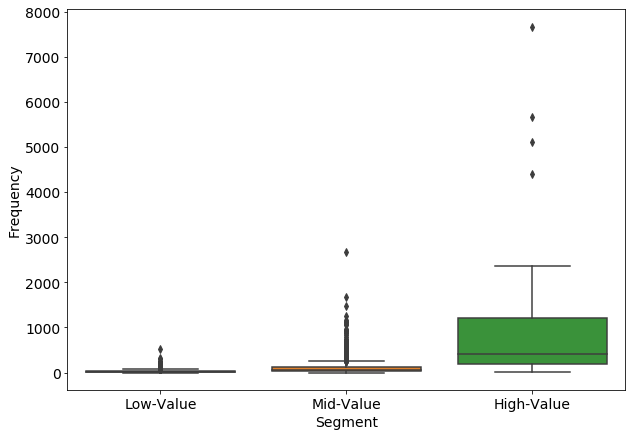

In [68]:
## How often were they shopping?

plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 14})
sns.boxplot(x="Segment", y="Frequency", data= user)
plt.show()

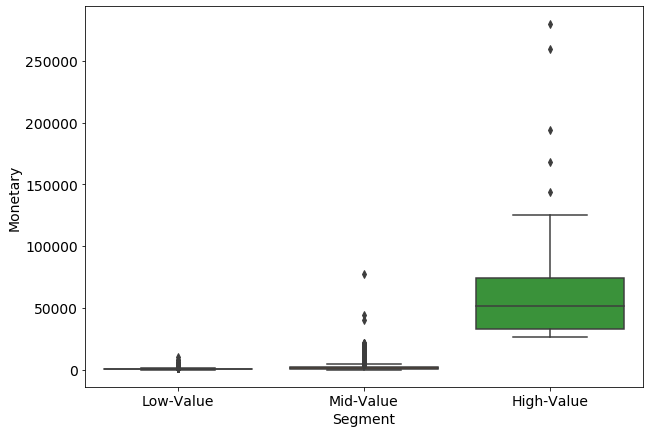

In [69]:
## How much do they contribute ( number or/and percentage) to the global sale?

plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 14})
sns.boxplot(x="Segment", y="Monetary", data= user)
plt.show()

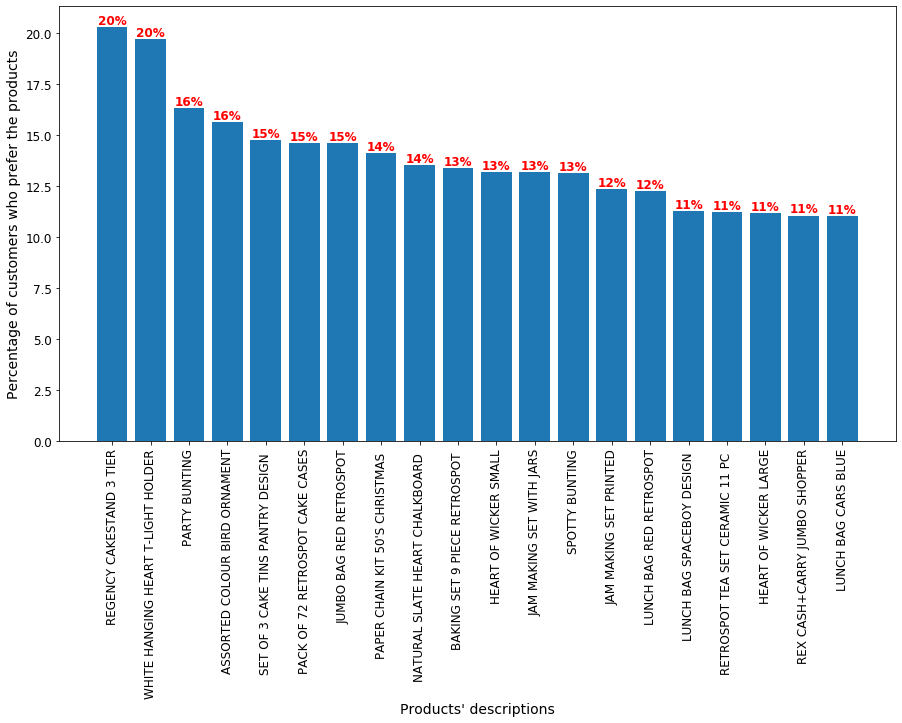

In [70]:
## This graph shows the top 20 most prefered products 
show_top_20_prefered_products(data_desc)

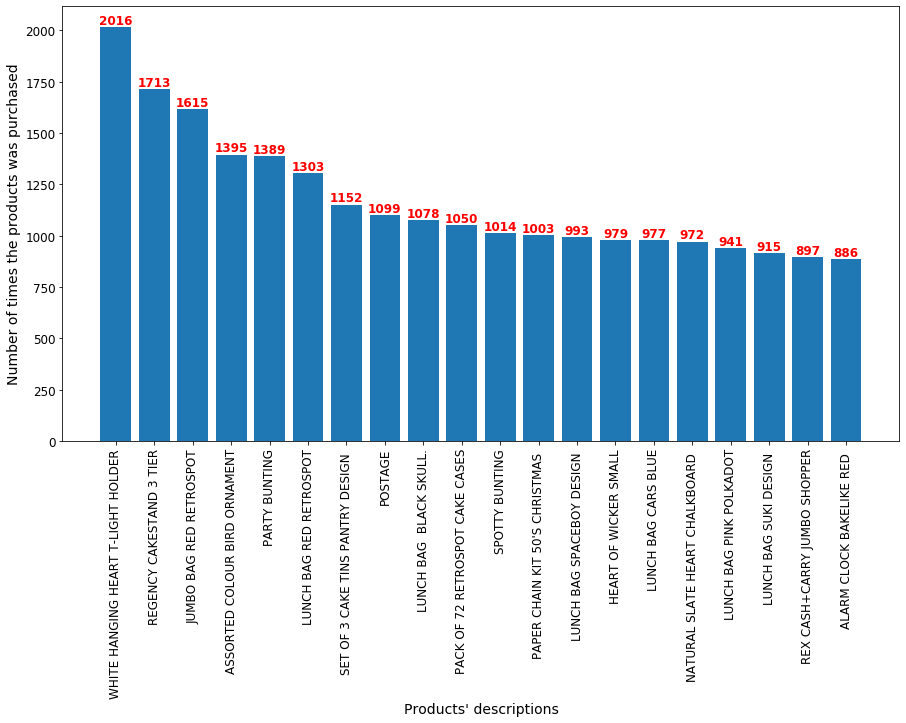

In [71]:
## This graph shows the top 20 of the products the most bought
show_top_20_most_bought_products(data_desc)

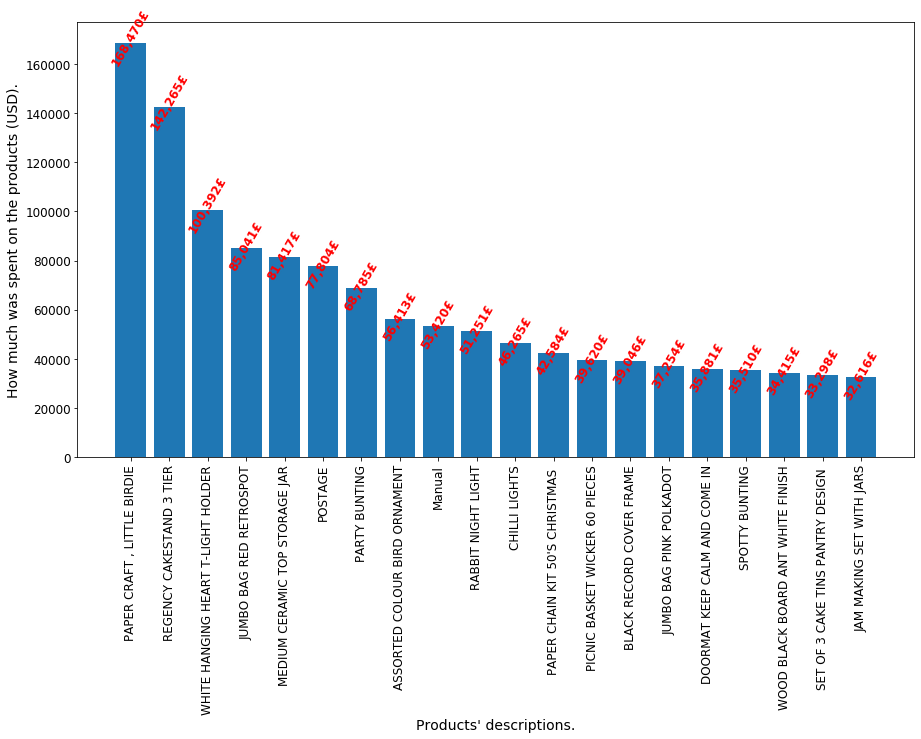

In [72]:
## This graph shows the top 20 products that produce the higher revenue
show_top_20_most_profitable_products(data_desc)